<a href="https://colab.research.google.com/github/sergeymasl/pandas_cource/blob/main/Creating%2C_Reading_and_Writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating, Reading and Writing**

## Вступление
В этом мини-курсе вы познакомитесь и изучите основы библиотеки [pandas](https://pandas.pydata.org/), самой популярной библиотеки Python для анализа данных.

Во время обучения, вы самостоятельно выполните несколько упражнений на реальных данных. После прочтения блоков курса, рекомендуется выполнять блоки соответствующих упражнений.


В этом блоке вы изучете, как создать ваш собственный массив данных и как работать с уже созданными данными.


**Отступление по условностям работы с платформой**
После блока с обучающим материалом идут ячейки с кодом, выполняя который вы можете проверить работу кода, данного в обучающем материале.

Для запуска ячейки клацните по иконке *play*

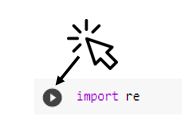

Или нажмите Ctrl + Enter находясь в ячейке

## Начало работы

При работе с библиотекой pandas, вы, как правило, будете начинать свою работу со следующего кода.

```python
import pandas as pd
```

In [2]:
import pandas as pd

## Создание фрейма данных

В библиотеке Pandas есть два ключевых объекта: **DataFrame** и **Series**

### DataFrame

Говоря простыми словами DataFrame это таблица. Он содержит набор *ячеек* каждая из которых содержит собственное значение. Каждой ячейке соответсвует *строка* и *столбец*.

Для примера, расмотрим ниже простой DataFrame:
```python
pd.DataFrame({'Yes' : [50, 21], 'No' : [131, 2]})
```

|    |   Yes |   No |
|---:|------:|-----:|
|  0 |    50 |  131 |
|  1 |    21 |    2 |

\

В этом примере, *ячейка* с *адресом* "0, No" имеет значение 131. *ячейка* с *адресом* "0, Yes" имеет значение 50, и так далее.

In [ ]:
pd.DataFrame({'Yes' : [50, 21], 'No' : [131, 2]})


Значения в DataFrame не ограничиваются только целыми числами (```Int```). Для примера вот DataFrame в котором данные являются строками (```Str```)

```python
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})
```

|    | Bob           | Sue          |
|---:|:--------------|:-------------|
|  0 | I liked it.   | Pretty good. |
|  1 | It was awful. | Bland.       |

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

Мы использовали конструкцию ```pd.DataFrame()``` для создания этих объектов DataFrame. Синтаксис, сообщающий системе о создании нового DataFrame, это словарь (```dict```), ключи которого ивляются **именами столбцов** (```Bod``` и ```Sue``` в примере), а значения - это списки (```list```) с данными в столбцах. Это один из стандартных способ создания нового DataFrame, который будет встречаться вам наиболее часто.

\
Конструкция со словарем сообщает **имена столбцов**, но при этом использует нумерация строк от 0 (0,1,2,3,...) для **имен строк**. Иногда это нормально, но чаще всего мы заходим дать **имена этим строка** самостоятельно, для лучшей ориентации в данных.

**Имена строк** в DataFrame (и не только в нем) именуются как **index**. Мы можем самостоятельно назначить индексы использую параметр ```index``` при создании DataFrame.

```python
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])
```

|           | Bob           | Sue          |
|:----------|:--------------|:-------------|
| Product A | I liked it.   | Pretty good. |
| Product B | It was awful. | Bland.       |


In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

### Series